In [1]:
import pandas as pd
import numpy as np


csvfile = "Tweets.csv"
balancedfile = "BalancedUncleanFile.csv"
df = pd.read_csv(csvfile)#Pandas DataFrame is 2-D,tabular data structure with labeled rows and columns

#counting total no. of records
totalPositiveRecords = len(df[df["airline_sentiment"] == "positive"])
totalNegativeRecords = len(df[df["airline_sentiment"] == "negative"])
totalNeutralRecords = len(df[df["airline_sentiment"] == "neutral"])
print("No of Positive= ", totalPositiveRecords) #2363
print("No of Negative= ",totalNegativeRecords)
print("No of Neutral = ", totalNeutralRecords)

#indices
negativeIndices = df[df['airline_sentiment'] == "negative"].index
positiveIndices = df[df['airline_sentiment'] == "positive"].index
neutralIndices = df[df['airline_sentiment'] == "neutral"].index

#randomaly selecting the records wrt sentiments
random_Positive_indices = np.random.choice(positiveIndices, totalPositiveRecords, replace=False)
random_Negative_indices = np.random.choice(negativeIndices, totalPositiveRecords, replace=False)
random_Neutral_indices = np.random.choice(neutralIndices, totalPositiveRecords, replace=False)

allIndices = np.concatenate([random_Positive_indices,random_Negative_indices,random_Neutral_indices])
df = df.iloc[allIndices] 
df.to_csv(balancedfile) #converting back to csv
print("A balanced *",balancedfile,"* file created")


No of Positive=  2363
No of Negative=  9178
No of Neutral =  3099
A balanced * BalancedUncleanFile.csv * file created


In [2]:
import re, csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


stopWordList = set(stopwords.words('english')) 
stemmer = PorterStemmer()
punctuations = "-?.!'"

tweetsData = []
sentiment = []
dict1 = {}
 
with open(balancedfile) as csvfile:
    data = csv.reader(csvfile, delimiter=',')
    i=0
    for row in data:
        data = row[11]
        senti = row[2]
        sentiment.append(senti)
        tokenArr = re.split('[(\[\]\+*:.!\,-?;)]', data)
#         tokenArr =  data.split()
        cleanTextList = []        
        for token in tokenArr:
            if not token in stopWordList:
                token = stemmer.stem(token) #stemming
                if token in punctuations:#replacing punctuations
                #print(token)
                    token = "<PUNCT>"
                else:
                    #token = re.sub('#[^\s]+',"<HASHTAG>",token)#replacing #hastage 
                    token = re.sub('@[^\s]+',"<USERNAME>",token)#replacing @username from token 
                    token = re.sub(r"http\S+", "<URL>", token)  #replacing url from token     
                    token = re.sub(r"\//\S+", "<URL>", token)  #replacing url from token like this: //t.co/mWpG7grEZP
                token = token.lower()

            cleanTextList.append(token)
            
        cleanText = ' '.join(cleanTextList)
        tweetsData.append(cleanText)
#         if(i >= 30):
#             break
#         i=1+1

    

# for i in tweetsData: print (i)
# print("balanced_clean created")     
# print(tweetsData)
print("EOD")

EOD


In [3]:

wtr = csv.writer(open ('balanced_clean.csv', 'w'), delimiter=',', lineterminator='\n')
for i in range(1,7068) : 
    wtr.writerow ([sentiment[i], tweetsData[i]])
    
print("done")


done


In [15]:
#Splitting DataSet for Training and Testing
from sklearn.model_selection import train_test_split


targetSentiment = ["positive", "negative","neutral"]

X_train, X_test, Y_train, Y_test = train_test_split(tweetsData, sentiment, test_size =0.35)
#Convert a collection of text documents to a matrix of token counts
#Count Vectorizer ignores uni-character words as it has no information
countVector = CountVectorizer() 
vocab= countVector.fit(X_train)
termCountMatrix = countVector.transform(X_train)
print("running")
print("SHAPE:"+ str(termCountMatrix.shape)) #3 documents and 7 unique terms/vocab

#TFIDF
tfIdfTransformer = TfidfTransformer()
tfIdfTransformer.fit(termCountMatrix)#sorted in the order of Features array
#print("TFIDF:" + str(tfIdfTransformer.idf_))

tdIdfMatrix = tfIdfTransformer.transform(termCountMatrix)
# print("TFIDF:" + str(tdIdfMatrix.toarray()))


#------Training NB Model-----
model = MultinomialNB().fit(tdIdfMatrix,Y_train)


#------Testing NB Model-----
newVectorMatrix = countVector.transform(X_test)
newTFMatrix =  tfIdfTransformer.transform(newVectorMatrix)
predicted = model.predict(newTFMatrix)
print("PREDICT",predicted)

accuracy = metrics.accuracy_score(Y_test,predicted)
print("accuracy:", accuracy)
print(metrics.classification_report(Y_test, predicted, targetSentiment))


running
SHAPE:(4608, 7155)
PREDICT ['positive' 'negative' 'positive' ... 'negative' 'positive' 'positive']
accuracy: 0.7203867848509267
              precision    recall  f1-score   support

    positive       0.80      0.73      0.77       841
    negative       0.66      0.84      0.74       845
     neutral       0.72      0.58      0.64       795

   micro avg       0.72      0.72      0.72      2481
   macro avg       0.73      0.72      0.72      2481
weighted avg       0.73      0.72      0.72      2481



[[617 131  93]
 [ 49 706  90]
 [105 225 465]]


Text(30.453125, 0.5, 'predicted label')

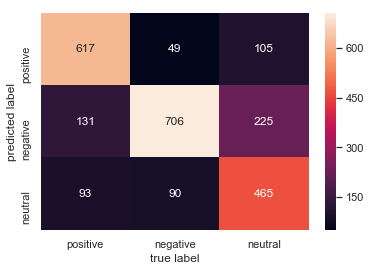

In [16]:
ConMetrics = metrics.confusion_matrix(Y_test,predicted,targetSentiment)
print(ConMetrics)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sns.heatmap(ConMetrics.T, annot=True, fmt='d', xticklabels= targetSentiment, yticklabels= targetSentiment)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [23]:
test =  ['bad', 'sad', 'happy', 'unhappy']
newVectorMatrix = countVector.transform(test)
newTFMatrix =  tfIdfTransformer.transform(newVectorMatrix)
predicted = model.predict(newTFMatrix)
print("PREDICT",predicted)

PREDICT ['negative' 'negative' 'positive' 'negative' 'positive']
